# Amplitude Scatter Plot
- need python3.7 for pymata4

<IPython.core.display.Javascript object>


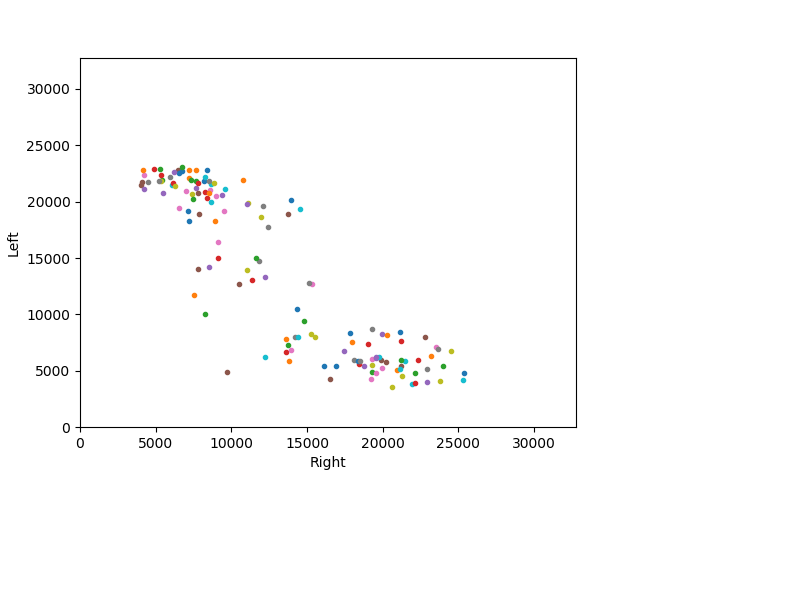

pymata4:  Version 1.01

Copyright (c) 2020 Alan Yorinks All Rights Reserved.

Opening all potential serial ports...
	COM14

Waiting 4 seconds(arduino_wait) for Arduino devices to reset...

Searching for an Arduino configured with an arduino_instance = 1
Arduino compatible device found and connected to COM14

Retrieving Arduino Firmware ID...
Arduino Firmware ID: 2.5 FirmataExpress.ino

Retrieving analog map...
Auto-discovery complete. Found 22 Digital Pins and 8 Analog Pins




C:\Users\anura\Anaconda3\envs\tensorflow_2\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [1]:
# Date : 12.04.2020
# version : 0.3.200412
# optimal rate ~ 20 radings/second
# max rate(count) ~ 43/second

import pyaudio
import numpy as np
import time
import keyboard
from matplotlib import pyplot as plt 
from pymata4 import pymata4
%matplotlib notebook

DIGITAL_PIN = 2
TONE_PIN = 3

count = 21

CHUNK = 1024
RATE = 44100
CHANNELS = 2
FORMAT = pyaudio.paInt16

p = pyaudio.PyAudio()
stream = p.open(format = FORMAT,
                channels = CHANNELS,
                rate = RATE,
                input = True, 
                frames_per_buffer = CHUNK)

def the_callback(data):
    if data[2]:                                 # If the value of the button press is HIGH
        maxL = []
        maxR = []
        board.play_tone(TONE_PIN, 256, 1000)
        for i in range(count):
            data = np.fromstring(stream.read(CHUNK),dtype = np.int16)
            rawL = data[0::2]
            rawR = data[1::2]
            #print(np.abs(np.max(rawL)),'-',np.abs(np.max(rawR)))
            maxL.append(np.abs(np.max(rawL)))
            maxR.append(np.abs(np.max(rawR)))
        #print('-------------')    
        left = np.average(maxL[5:])             # Average by removing the first 5 indicies
        right = np.average(maxR[5:])  
        #print(left,'-',right)
        plot, = ax.plot(right, left, '.')
        fig.canvas.draw()
        fig.canvas.flush_events() 
        
fig, ax = plt.subplots()
plt.axis([0, 2**15, 0, 2**15])
plt.xlabel("Right")
plt.ylabel("Left")
        
board = pymata4.Pymata4()
board.set_pin_mode_tone(TONE_PIN)
board.set_pin_mode_digital_input(DIGITAL_PIN, callback = the_callback)

while True:
    if keyboard.is_pressed('Esc'):              # Exit the loop by pressing 'Esc'
        stream.stop_stream()
        stream.close()
        p.terminate()
        board.shutdown()
        break